In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

In [205]:
# Load Zomato dataset
zomato_data_url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv"
zomato_df = pd.read_csv(zomato_data_url, encoding='ISO-8859-1')

In [206]:
file_path = 'zomato_data.xlsx'
zomato_df.to_excel(file_path, index=False)

In [207]:
# Load the Excel file by specifying the engine
country_code_url = "https://github.com/nethajinirmal13/Training-datasets/blob/main/zomato/Country-Code.xlsx?raw=true"
country_df = pd.read_excel(country_code_url, engine='openpyxl')

In [208]:
file_path = 'country_data.xlsx'
country_df.to_excel(file_path, index=False)

In [209]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [210]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [211]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [212]:
country_df['Country'].unique()

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [213]:
country_df.columns

Index(['Country Code', 'Country'], dtype='object')

In [214]:
# Merge the datasets
zomato_df = zomato_df.merge(country_df, on='Country Code', how='left')

In [215]:
zomato_df['Cuisines'].fillna('Not Available', inplace=True)

C:\Users\Divya\AppData\Local\Temp\ipykernel_10936\3807789781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomato_df['Cuisines'].fillna('Not Available', inplace=True)


In [216]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [217]:

zomato_df['City'] = zomato_df['City'].replace("å¿stanbul", "Istanbul")
zomato_df['Address'] = zomato_df['Address'].replace("å¿stanbul", "Istanbul", regex=True)
zomato_df['Locality Verbose'] = zomato_df['Locality Verbose'].replace("å¿stanbul", "Istanbul", regex=True)

In [218]:
def clean_text(text):
    # Normalize unicode characters (e.g., remove accents)
    text = unicodedata.normalize('NFKD', text)
    # Remove unwanted characters (keeping only letters and spaces)
    text = ''.join(c for c in text if c.isalpha() or c.isspace())
    # Normalize whitespace
    text = ' '.join(text.split())
    # Convert to lowercase
    text = text.lower()
    return text

In [219]:
zomato_df['City'] = zomato_df['City'].apply(clean_text)
zomato_df['Locality'] = zomato_df['Locality'].apply(clean_text)
zomato_df['Locality Verbose'] = zomato_df['Locality Verbose'].apply(clean_text)
zomato_df['Restaurant Name'] = zomato_df['Restaurant Name'].apply(clean_text)
zomato_df['Address'] = zomato_df['Address'].apply(clean_text)


In [220]:
zomato_df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [221]:
zomato_df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(å°\x88)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [222]:
# Conversion currency to INR
exchange_rates = {
    'Phillipines': 1.5,      # PHP to INR
    'Brazil': 15.0,          # BRL to INR
    'United States': 82.0,   # USD to INR
    'Australia': 50.0,       # AUD to INR
    'Canada': 60.0,          # CAD to INR
    'Singapore': 55.0,       # SGD to INR
    'UAE': 22.0,             # AED to INR
    'India': 1.0,            # INR (No conversion needed)
    'Indonesia': 0.0055,     # IDR to INR
    'New Zealand': 48.0,     # NZD to INR
    'United Kingdom': 100.0, # GBP to INR
    'Qatar': 22.5,           # QAR to INR
    'South Africa': 4.5,     # ZAR to INR
    'Sri Lanka': 0.25,       # LKR to INR
    'Turkey': 7.0            # TRY to INR
}

# Adding a new column for price in INR
zomato_df['Price_INR'] = zomato_df.apply(
    lambda x: x['Average Cost for two'] * exchange_rates.get(x['Country'], 1), axis=1
)


In [223]:
zomato_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Price_INR
0,6317637,le petit souffle,162,makati city,third floor century city mall kalayaan avenue ...,century city mall poblacion makati city,century city mall poblacion makati city makati...,121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1650.0
1,6304287,izakaya kikufuji,162,makati city,little tokyo chino roces avenue legaspi villag...,little tokyo legaspi village makati city,little tokyo legaspi village makati city makat...,121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1800.0
2,6300002,heat edsa shangrila,162,mandaluyong city,edsa shangrila garden way ortigas mandaluyong ...,edsa shangrila ortigas mandaluyong city,edsa shangrila ortigas mandaluyong city mandal...,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,6000.0


In [224]:
zomato_df_cleaned = zomato_df[zomato_df['Restaurant Name'].str.strip() != '']

In [225]:
zomato_df1=zomato_df_cleaned
zomato_df1.drop(columns=['Country Code'], inplace=True)
file_path = 'zomato_updated.xlsx'
zomato_df1.to_excel(file_path, index=False)

C:\Users\Divya\AppData\Local\Temp\ipykernel_10936\365844036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df1.drop(columns=['Country Code'], inplace=True)


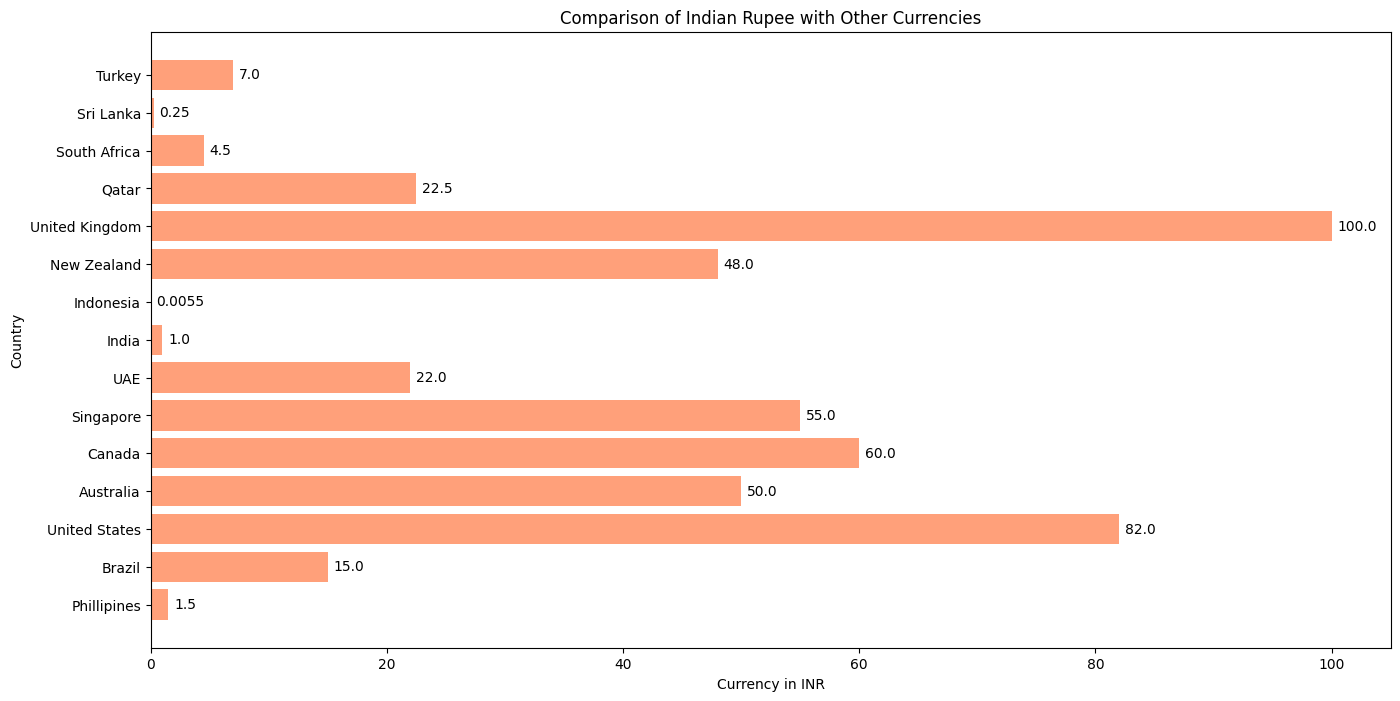

In [226]:
# Data for plotting
currencies = list(exchange_rates.keys())
rates = list(exchange_rates.values())

# Plotting exchange rates comparison
plt.figure(figsize=(16, 8)) 
bars = plt.barh(currencies, rates, color='lightsalmon')

# Adding value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

plt.title('Comparison of Indian Rupee with Other Currencies')
plt.xlabel('Currency in INR')
plt.ylabel('Country')
plt.show()

In [227]:
zomato_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9549 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9549 non-null   int64  
 1   Restaurant Name       9549 non-null   object 
 2   City                  9549 non-null   object 
 3   Address               9549 non-null   object 
 4   Locality              9549 non-null   object 
 5   Locality Verbose      9549 non-null   object 
 6   Longitude             9549 non-null   float64
 7   Latitude              9549 non-null   float64
 8   Cuisines              9549 non-null   object 
 9   Average Cost for two  9549 non-null   int64  
 10  Currency              9549 non-null   object 
 11  Has Table booking     9549 non-null   object 
 12  Has Online delivery   9549 non-null   object 
 13  Is delivering now     9549 non-null   object 
 14  Switch to order menu  9549 non-null   object 
 15  Price range           9549

In [228]:
# Check rows where Cuisines is 'Not Available'
zomato_df_cleaned[zomato_df_cleaned['Cuisines'] == 'Not Available'].head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Price_INR
84,17284105,cookie shoppe,albany,n jackson st albany ga,albany,albany albany,-84.154000,31.57720,Not Available,0,...,No,No,No,1,3.4,Orange,Average,34,United States,0.0
87,17284211,pearlys famous country cookng,albany,n slappey blvd albany ga,albany,albany albany,-84.175900,31.58820,Not Available,0,...,No,No,No,1,3.4,Orange,Average,36,United States,0.0
94,17284158,jimmies hot dogs,albany,s jackson st albany ga,albany,albany albany,-84.153400,31.57510,Not Available,10,...,No,No,No,1,3.9,Yellow,Good,160,United States,820.0
297,17374552,corkscrew cafe,gainesville,w main st dahlonega ga,dahlonega,dahlonega gainesville,-83.985800,34.53180,Not Available,40,...,No,No,No,3,3.9,Yellow,Good,209,United States,3280.0
328,17501439,dovetail,macon,cherry st macon ga,macon,macon macon,-83.627979,32.83641,Not Available,40,...,No,No,No,3,3.8,Yellow,Good,102,United States,3280.0
